After the database is built (in three subsets), we can analyze the data to a better understanding and quality. We do it subset by subset first since we are not sure if there is any system difference besides format between them.

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use(['seaborn-colorblind', 'seaborn-talk'])
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300
plt.rcParams['savefig.bbox'] = 'tight'
plt.rcParams['font.sans-serif'] = ['Taipei Sans TC Beta'] # to plot Chinese words properly

import datetime
date = datetime.datetime.now().strftime('%Y%m%d')

# Merge and filter the whole dataset
I collect all subsets into one dataset and filter out the data from 濁水溪沖積扇 only.

In [15]:
%%time
merge_df = pd.DataFrame()
for age in ['before2019', '2019', 'a2019']:
    merge_df = pd.concat([merge_df, pd.read_csv('data/database_wl_{}_20211006.csv'.format(age))], axis=0, join='outer')

merge_df.info()

C:\Users\An-Sheng\Miniconda3\envs\ncdr\lib\site-packages\IPython\core\magics\execution.py:1321: DtypeWarning: Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code, glob, local_ns)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 184184950 entries, 0 to 67060171
Data columns (total 4 columns):
 #   Column  Dtype 
---  ------  ----- 
 0   井名      object
 1   井號      object
 2   水位(m)   object
 3   日期時間    object
dtypes: object(4)
memory usage: 6.9+ GB
Wall time: 3min 9s


In [21]:
excel_df = pd.read_excel('data/環保署水利署地下水井.xlsx')
excel_df.head()

,SiteId,SiteName,SiteEngName,County,Township,UgwDistName,TWD97Lon,TWD97Lat,TWD97TM2X,TWD97TM2Y,SiteAddress,StatusOfUse,數據紀錄始,數據紀錄終,資料數,data
0,4035,二林營運所,Erling Operation Center,彰化縣,二林鎮,濁水溪沖積扇,NaN,NaN,NaN,NaN,彰化縣二林鎮儒林路二段100號,廢站,1993/04,1999/05,18.0,環保署
1,4413,二崙國小,ErLun Elementary School,雲林縣,二崙鄉,濁水溪沖積扇,120.415102,23.771842,190386.40,2629878.33,雲林縣二崙鄉崙東村中興路36號,啟用,1999/08,2020/10,81.0,環保署
2,4133,二崙國小,ErLun Elementary School,雲林縣,二崙鄉,濁水溪沖積扇,NaN,NaN,NaN,NaN,雲林縣二崙鄉崙東村中興路36號,廢站,NaN,NaN,NaN,環保署
3,4403,口湖國小青蚶分校,"Kaohu Elementary School, Chingan Subdivision",雲林縣,口湖鄉,濁水溪沖積扇,120.161008,23.597331,164374.03,2610680.84,雲林縣口湖鄉青蚶村93號,啟用,1999/12,2020/10,84.0,環保署
4,4139,口湖國小青蚶分校,"Kaohu Elementary School, Chingan Subdivision",雲林縣,口湖鄉,濁水溪沖積扇,NaN,NaN,NaN,NaN,雲林縣口湖鄉青蚶村93號,廢站,NaN,NaN,NaN,環保署


In [17]:
merge_df[merge_df['井號'].isin(excel_df.SiteId)].shape

(38697849, 4)

### Small test on storing format
I compare the hdf format that pandas suposely run faster to the csv format I mostly use.

In [19]:
merge_df[merge_df['井號'].isin(excel_df.SiteId)].to_hdf('data/database_ZAF_{}.hd5'.format(date), key='wl', mode='w', encoding='big5')

C:\Users\An-Sheng\Miniconda3\envs\ncdr\lib\site-packages\pandas\core\generic.py:2703: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed-integer,key->block0_values] [items->Index(['井名', '井號', '水位(m)', '日期時間'], dtype='object')]

  pytables.to_hdf(


In [23]:
merge_df[merge_df['井號'].isin(excel_df.SiteId)].to_csv('data/database_ZAF_wl_{}.csv'.format(date), index=False)
print(date)

20211007


In [27]:
%%time
test = pd.read_hdf('data/database_ZAF_20211007.hd5')
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38697849 entries, 32114 to 65942432
Data columns (total 4 columns):
 #   Column  Dtype 
---  ------  ----- 
 0   井名      object
 1   井號      object
 2   水位(m)   object
 3   日期時間    object
dtypes: object(4)
memory usage: 1.4+ GB
Wall time: 30.8 s


In [29]:
%%time
test = pd.read_csv('data/database_ZAF_wl_20211007.csv')
test.info()

C:\Users\An-Sheng\Miniconda3\envs\ncdr\lib\site-packages\IPython\core\magics\execution.py:1321: DtypeWarning: Columns (1,2) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code, glob, local_ns)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38697849 entries, 0 to 38697848
Data columns (total 4 columns):
 #   Column  Dtype 
---  ------  ----- 
 0   井名      object
 1   井號      object
 2   水位(m)   object
 3   日期時間    object
dtypes: object(4)
memory usage: 1.2+ GB
Wall time: 37 s


The writing of hdf is significantly faster than csv (34 vs. 132 s), while the reading is similar (30 vs. 37 s). The storing size of hdf is way less than csv (1.2 vs. 1.8 GB). I will still use csv as storing format since it has performance warning when writing hdf, the reading speed I most concern is similar and my time is ticking. If I have time, I prefer to make sure the warning is fine and use hdf.

# Clean data

In [5]:
zaf_df = pd.read_csv('data/database_ZAF_wl_20211007.csv', dtype=object)
zaf_df.describe()

,井名,井號,水位(m),日期時間
count,38697849,38697849,38696441,38697849
unique,604,226,170728,250187
top,漢寶(3),7100211,-999998.0,2020-03-03 10:10
freq,173739,306676,955368,196


There are several things need to be checked:
1. The length of unique 井名 and 井號 is different.
1. There are negatives in the 水位(m).

## Deal with 井名 井號

In [9]:
zaf_df.loc[zaf_df['井號']=='7100211', '井名']

884369                   青山(1)
884370                   青山(1)
884371                   青山(1)
884372                   青山(1)
884373                   青山(1)
                   ...        
38206113    青山(1)             
38206114    青山(1)             
38206115    青山(1)             
38206116    青山(1)             
38206117    青山(1)             
Name: 井名, Length: 306676, dtype: object

Okay, there are spaces infront of the name...

In [11]:
zaf_df.iloc[884369, 0] == zaf_df.iloc[38206113, 0]

False

In [14]:
print(zaf_df.iloc[884369, 0])
print(zaf_df.iloc[38206113, 0])

青山(1)
青山(1)             


In [17]:
zaf_df.iloc[38206113, 0].split()

['青山(1)']

In [18]:
zaf_df.iloc[884369, 0].split()[0] == zaf_df.iloc[38206113, 0].split()[0]

True

In [19]:
name_mo = pd.Series([_.split()[0] for _ in zaf_df['井名']])
name_mo.describe()

count     38697849
unique         420
top          青山(1)
freq        256123
dtype: object

The unique is still not matched to 井號's unique (226). According to 秉諺's experience, it's very common that one well id has many different but similar naming. I'll just use the well id to find relevent well name in the excel file.

In [30]:
excel_df.head()

,SiteName,SiteEngName,County,Township,UgwDistName,TWD97Lon,TWD97Lat,TWD97TM2X,TWD97TM2Y,SiteAddress,StatusOfUse,數據紀錄始,數據紀錄終,資料數,data
SiteId,,,,,,,,,,,,,,,
4035,二林營運所,Erling Operation Center,彰化縣,二林鎮,濁水溪沖積扇,NaN,NaN,NaN,NaN,彰化縣二林鎮儒林路二段100號,廢站,1993/04,1999/05,18.0,環保署
4413,二崙國小,ErLun Elementary School,雲林縣,二崙鄉,濁水溪沖積扇,120.415102,23.771842,190386.40,2629878.33,雲林縣二崙鄉崙東村中興路36號,啟用,1999/08,2020/10,81.0,環保署
4133,二崙國小,ErLun Elementary School,雲林縣,二崙鄉,濁水溪沖積扇,NaN,NaN,NaN,NaN,雲林縣二崙鄉崙東村中興路36號,廢站,NaN,NaN,NaN,環保署
4403,口湖國小青蚶分校,"Kaohu Elementary School, Chingan Subdivision",雲林縣,口湖鄉,濁水溪沖積扇,120.161008,23.597331,164374.03,2610680.84,雲林縣口湖鄉青蚶村93號,啟用,1999/12,2020/10,84.0,環保署
4139,口湖國小青蚶分校,"Kaohu Elementary School, Chingan Subdivision",雲林縣,口湖鄉,濁水溪沖積扇,NaN,NaN,NaN,NaN,雲林縣口湖鄉青蚶村93號,廢站,NaN,NaN,NaN,環保署


In [39]:
# computation costs 774s
zaf_mo = pd.DataFrame()
for well_id in zaf_df['井號'].unique():
    X = zaf_df[zaf_df['井號'] == well_id].copy()
    X['井名'] = np.repeat(excel_df.loc[excel_df.SiteId.astype(str) == well_id, 'SiteName'].values, len(X))
    zaf_mo = pd.concat([zaf_mo, X], axis=0, join='outer')

In [182]:
zaf_mo

,井名,井號,水位(m),日期時間
0,顏厝,070215T1,0.48,2007-01-24
1,顏厝,070215T1,0.34,2007-01-26
2,顏厝,070215T1,0.71,2007-01-27
3,顏厝,070215T1,0.67,2007-01-28
4,顏厝,070215T1,0.16,2007-01-29
...,...,...,...,...
38388791,溫厝(1),9020111,43.004,2021-09-21 23:10
38388792,溫厝(1),9020111,43.004,2021-09-21 23:20
38388793,溫厝(1),9020111,43.004,2021-09-21 23:30
38388794,溫厝(1),9020111,43.004,2021-09-21 23:40


In [40]:
zaf_mo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38697849 entries, 0 to 38388795
Data columns (total 4 columns):
 #   Column  Dtype 
---  ------  ----- 
 0   井名      object
 1   井號      object
 2   水位(m)   object
 3   日期時間    object
dtypes: object(4)
memory usage: 1.4+ GB


In [41]:
zaf_mo.describe()

,井名,井號,水位(m),日期時間
count,38697849,38697849,38696441,38697849
unique,226,226,170728,250187
top,青山(1),7100211,-999998.0,2021-06-30 03:00
freq,306676,306676,955368,196


In [178]:
# try multiprocess
from dask import delayed
from dask.distributed import Client
client = Client(memory_limit='25GB')

In [179]:
def new_name(well_id, df, excel):
    X = df[df['井號'] == well_id].copy()
    X['井名'] = np.repeat(excel.loc[excel.SiteId.astype(str) == well_id, 'SiteName'].values, len(X))
    return X
def concat(compile_list):
    return pd.concat(compile_list, axis=0, join='outer')

df_future = client.scatter(zaf_df)
compile_list = []
for well_id in zaf_df['井號'].unique():
    df = delayed(new_name)(well_id, df_future, excel_df)
    compile_list.append(df)
    
total = delayed(concat)(compile_list)

In [180]:
total.visualize('results/change_name.svg')

In [181]:
# computation costs only 394s
zaf_mo = total.compute()

## clean 水位

### Find non-numeric values

In [85]:
pd.to_numeric(zaf_mo['水位(m)'].replace('缺測', 0))

0            0.480
1            0.340
2            0.710
3            0.670
4            0.160
             ...  
38388791    43.004
38388792    43.004
38388793    43.004
38388794    43.004
38388795    43.004
Name: 水位(m), Length: 38697849, dtype: float64

Okay this means all non-numeric values are '缺測', otherwise it'll pop errors. Therefore, I just need to change them into NA for later treating as missing values.

In [86]:
zaf_mo['水位(m)'] = pd.to_numeric(zaf_mo['水位(m)'], errors='coerce')

### Check the distibution

<AxesSubplot:ylabel='Frequency'>

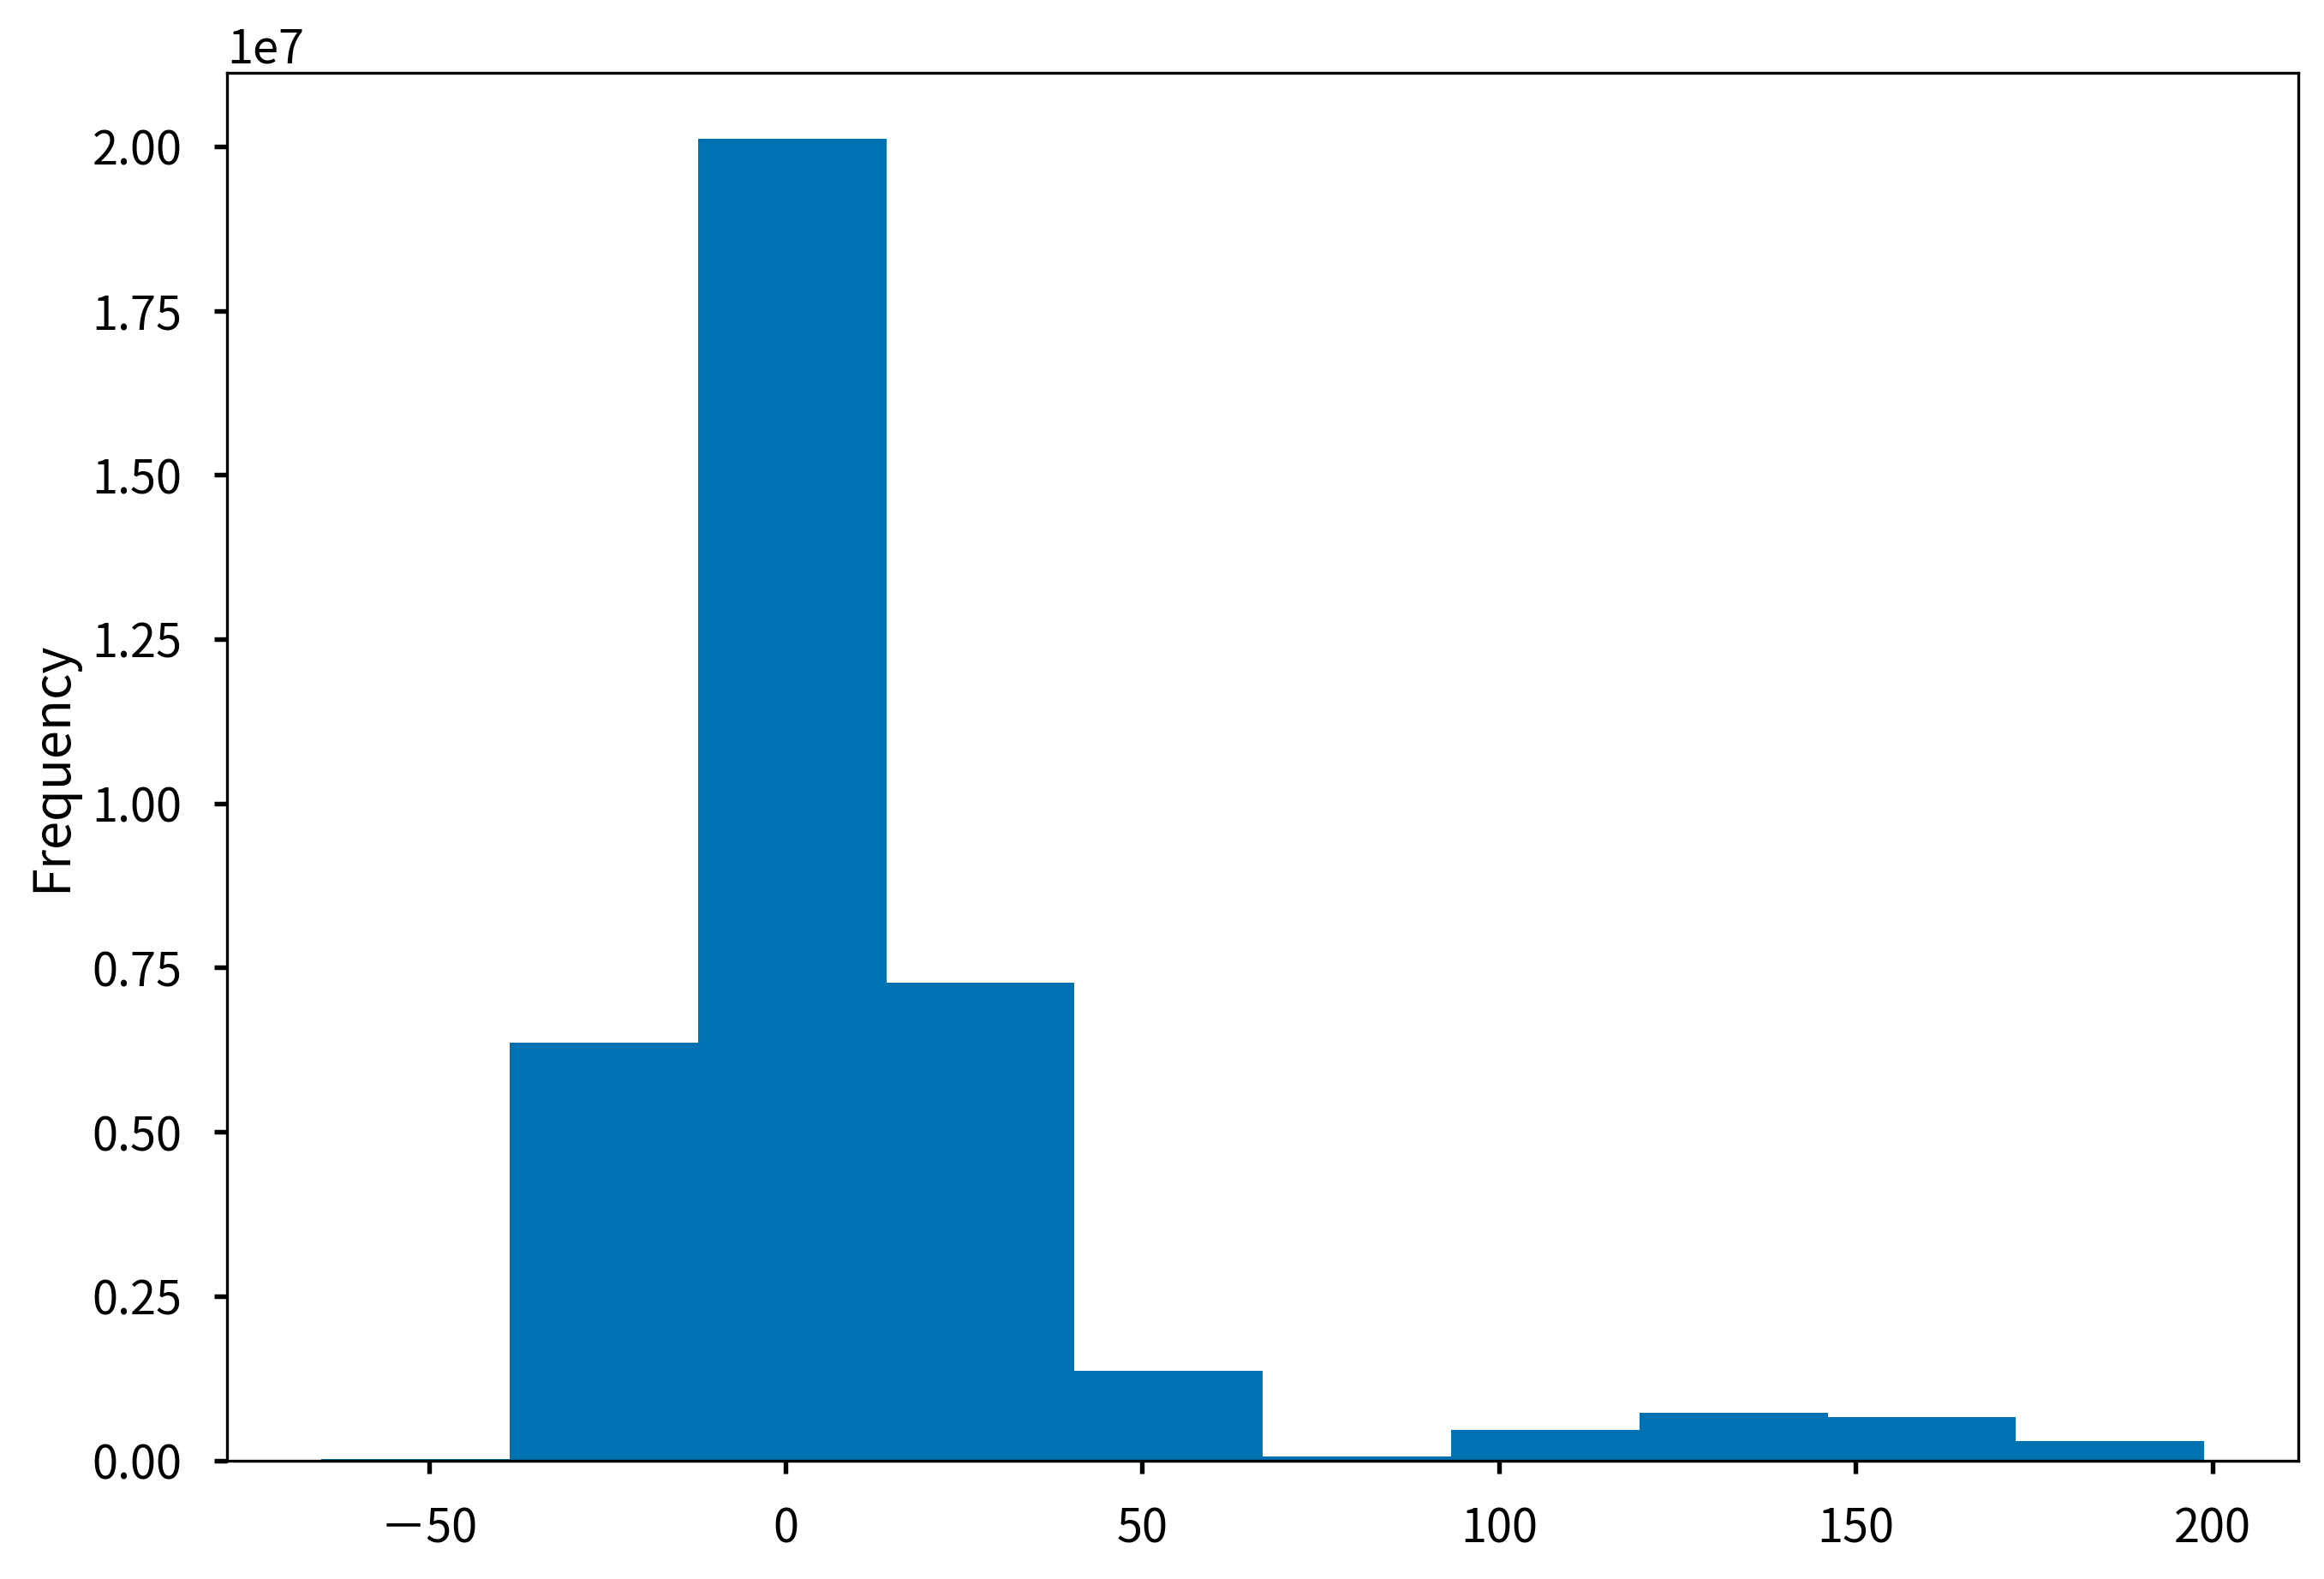

In [91]:
zaf_mo.loc[zaf_mo['水位(m)']>-500, '水位(m)'].plot(kind='hist')

In [93]:
zaf_mo.loc[zaf_mo['水位(m)']<-500, '水位(m)'].describe()

count    955368.0
mean    -999998.0
std           0.0
min     -999998.0
25%     -999998.0
50%     -999998.0
75%     -999998.0
max     -999998.0
Name: 水位(m), dtype: float64

Apparently, those extremly negative values are all -999998.0, which should be change to missing value as well. The other negative values should also be treated accordingly seems they also reflecting the missing values caused by instrument error.

In [98]:
zaf_mo2 = pd.concat([zaf_mo.iloc[:, [0,1,3]], zaf_mo.loc[zaf_mo['水位(m)'] >= 0, '水位(m)']], axis=1, join='outer')
zaf_mo2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38697849 entries, 0 to 38697848
Data columns (total 4 columns):
 #   Column  Dtype  
---  ------  -----  
 0   井名      object 
 1   井號      object 
 2   日期時間    object 
 3   水位(m)   float64
dtypes: float64(1), object(3)
memory usage: 1.4+ GB


count    1.858463e+07
mean     3.413996e+01
std      4.403955e+01
min      0.000000e+00
25%      7.192000e+00
50%      1.954400e+01
75%      3.561100e+01
max      1.988700e+02
Name: 水位(m), dtype: float64


<AxesSubplot:ylabel='Frequency'>

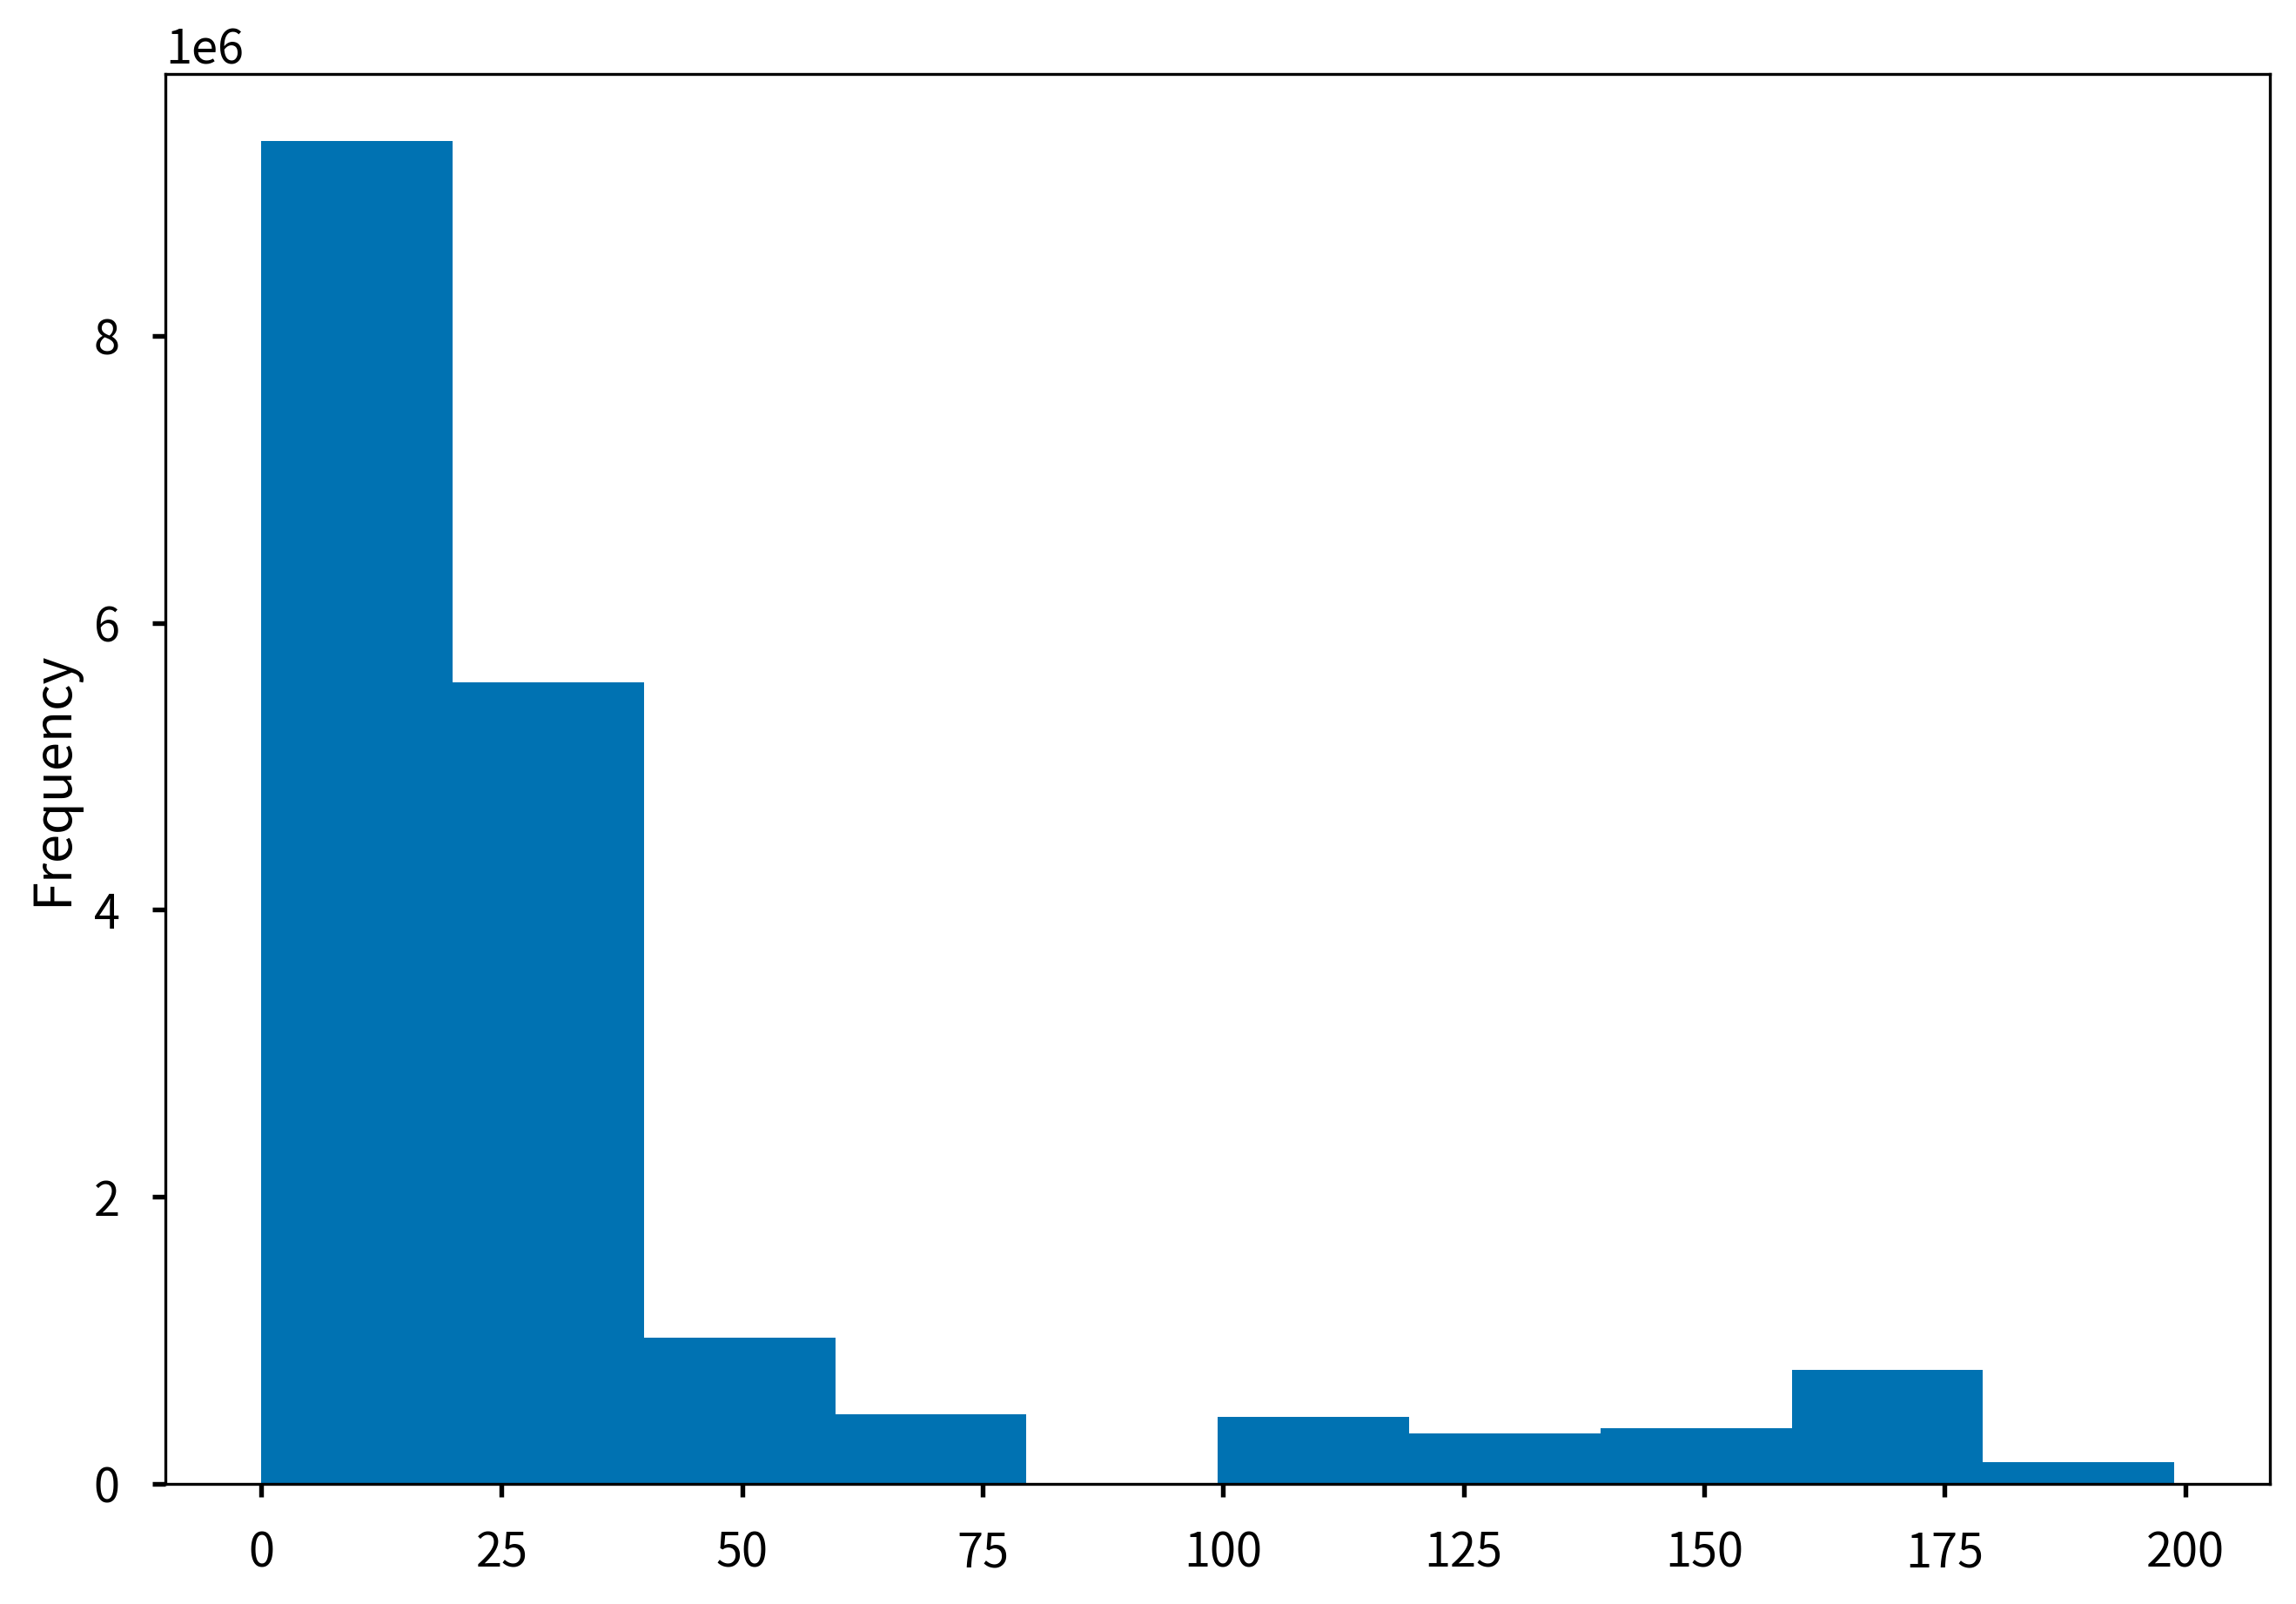

In [99]:
print(zaf_mo2['水位(m)'].describe())
zaf_mo2['水位(m)'].plot(kind='hist')

In [101]:
zaf_mo2['水位(m)'].count()/len(zaf_mo2)

0.4802496386814678

In [102]:
(zaf_mo['水位(m)']<0).sum()

19689977

In [113]:
print('There are {} points initially wihout measurement.'.format(zaf_df['水位(m)'].isna().sum()))
print('There are {} points recorded as 缺測.'.format((zaf_df['水位(m)']=='缺測').sum()))
print('There are {} points recorded as -999998.'.format((zaf_mo['水位(m)'] == -999998).sum()))
print('There are {} points recorded in slightly negative values (-50~0).'.format(((zaf_mo['水位(m)'] != -999998) & (zaf_mo['水位(m)'] < 0)).sum()))
print('Only {} points with valid values.'.format(zaf_mo2['水位(m)'].count()))

There are 1408 points initially wihout measurement.
There are 421836 points recorded as 缺測.
There are 955368 points recorded as -999998.
There are 18734609 points recorded in slightly negative values (-50~0).
Only 18584628 points with valid values.


In [112]:
1408+421836+955368+18734609+18584628 - len(zaf_mo2)

0

In [114]:
zaf_mo2['水位(m)'].count()/len(zaf_mo2)*100

48.02496386814678

## Check which wells having most of negatives

In [116]:
values, counts = np.unique(zaf_mo2.loc[zaf_mo2['水位(m)'].isna(), '井名'], return_counts=True)
len(values)

222

20211007


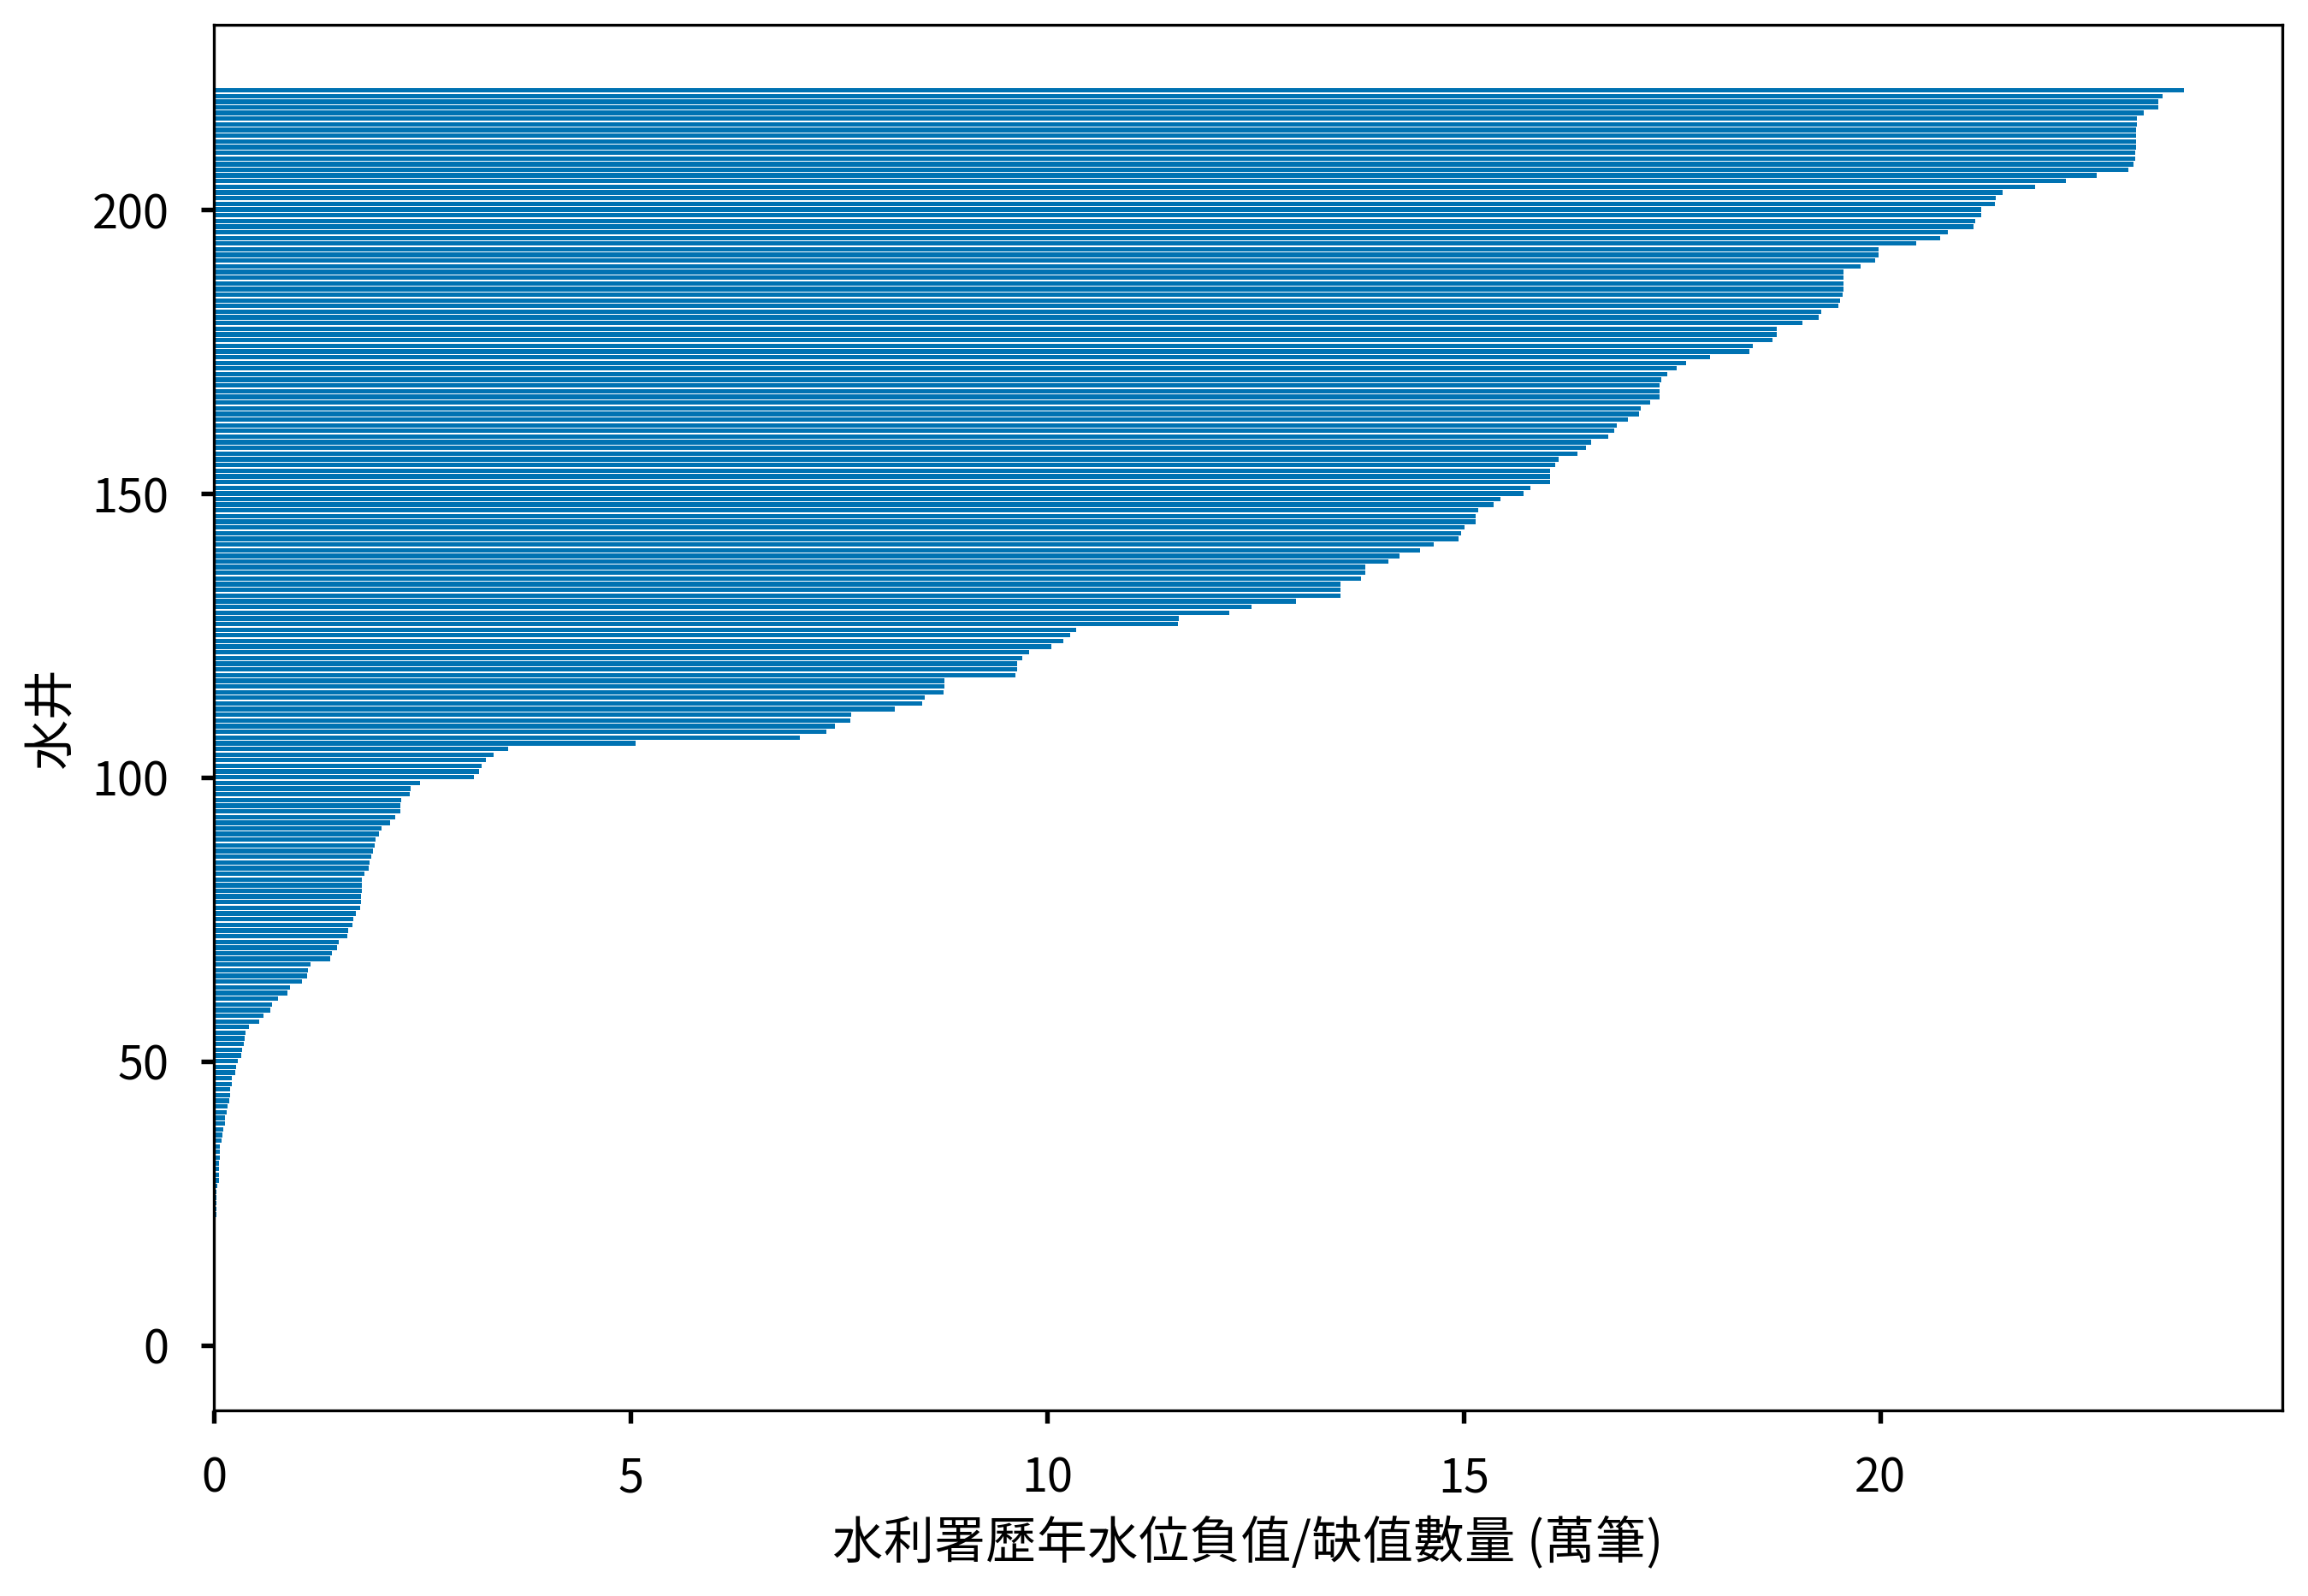

In [127]:
idx = np.argsort(counts)
plt.barh(range(len(values)), counts[idx]*.0001)
plt.xlabel('水利署歷年水位負值/缺值數量 (萬筆)')
plt.ylabel('水井')
plt.savefig('results/wl_wra_negative_amount_{}.png'.format(date))
print(date)

20211007


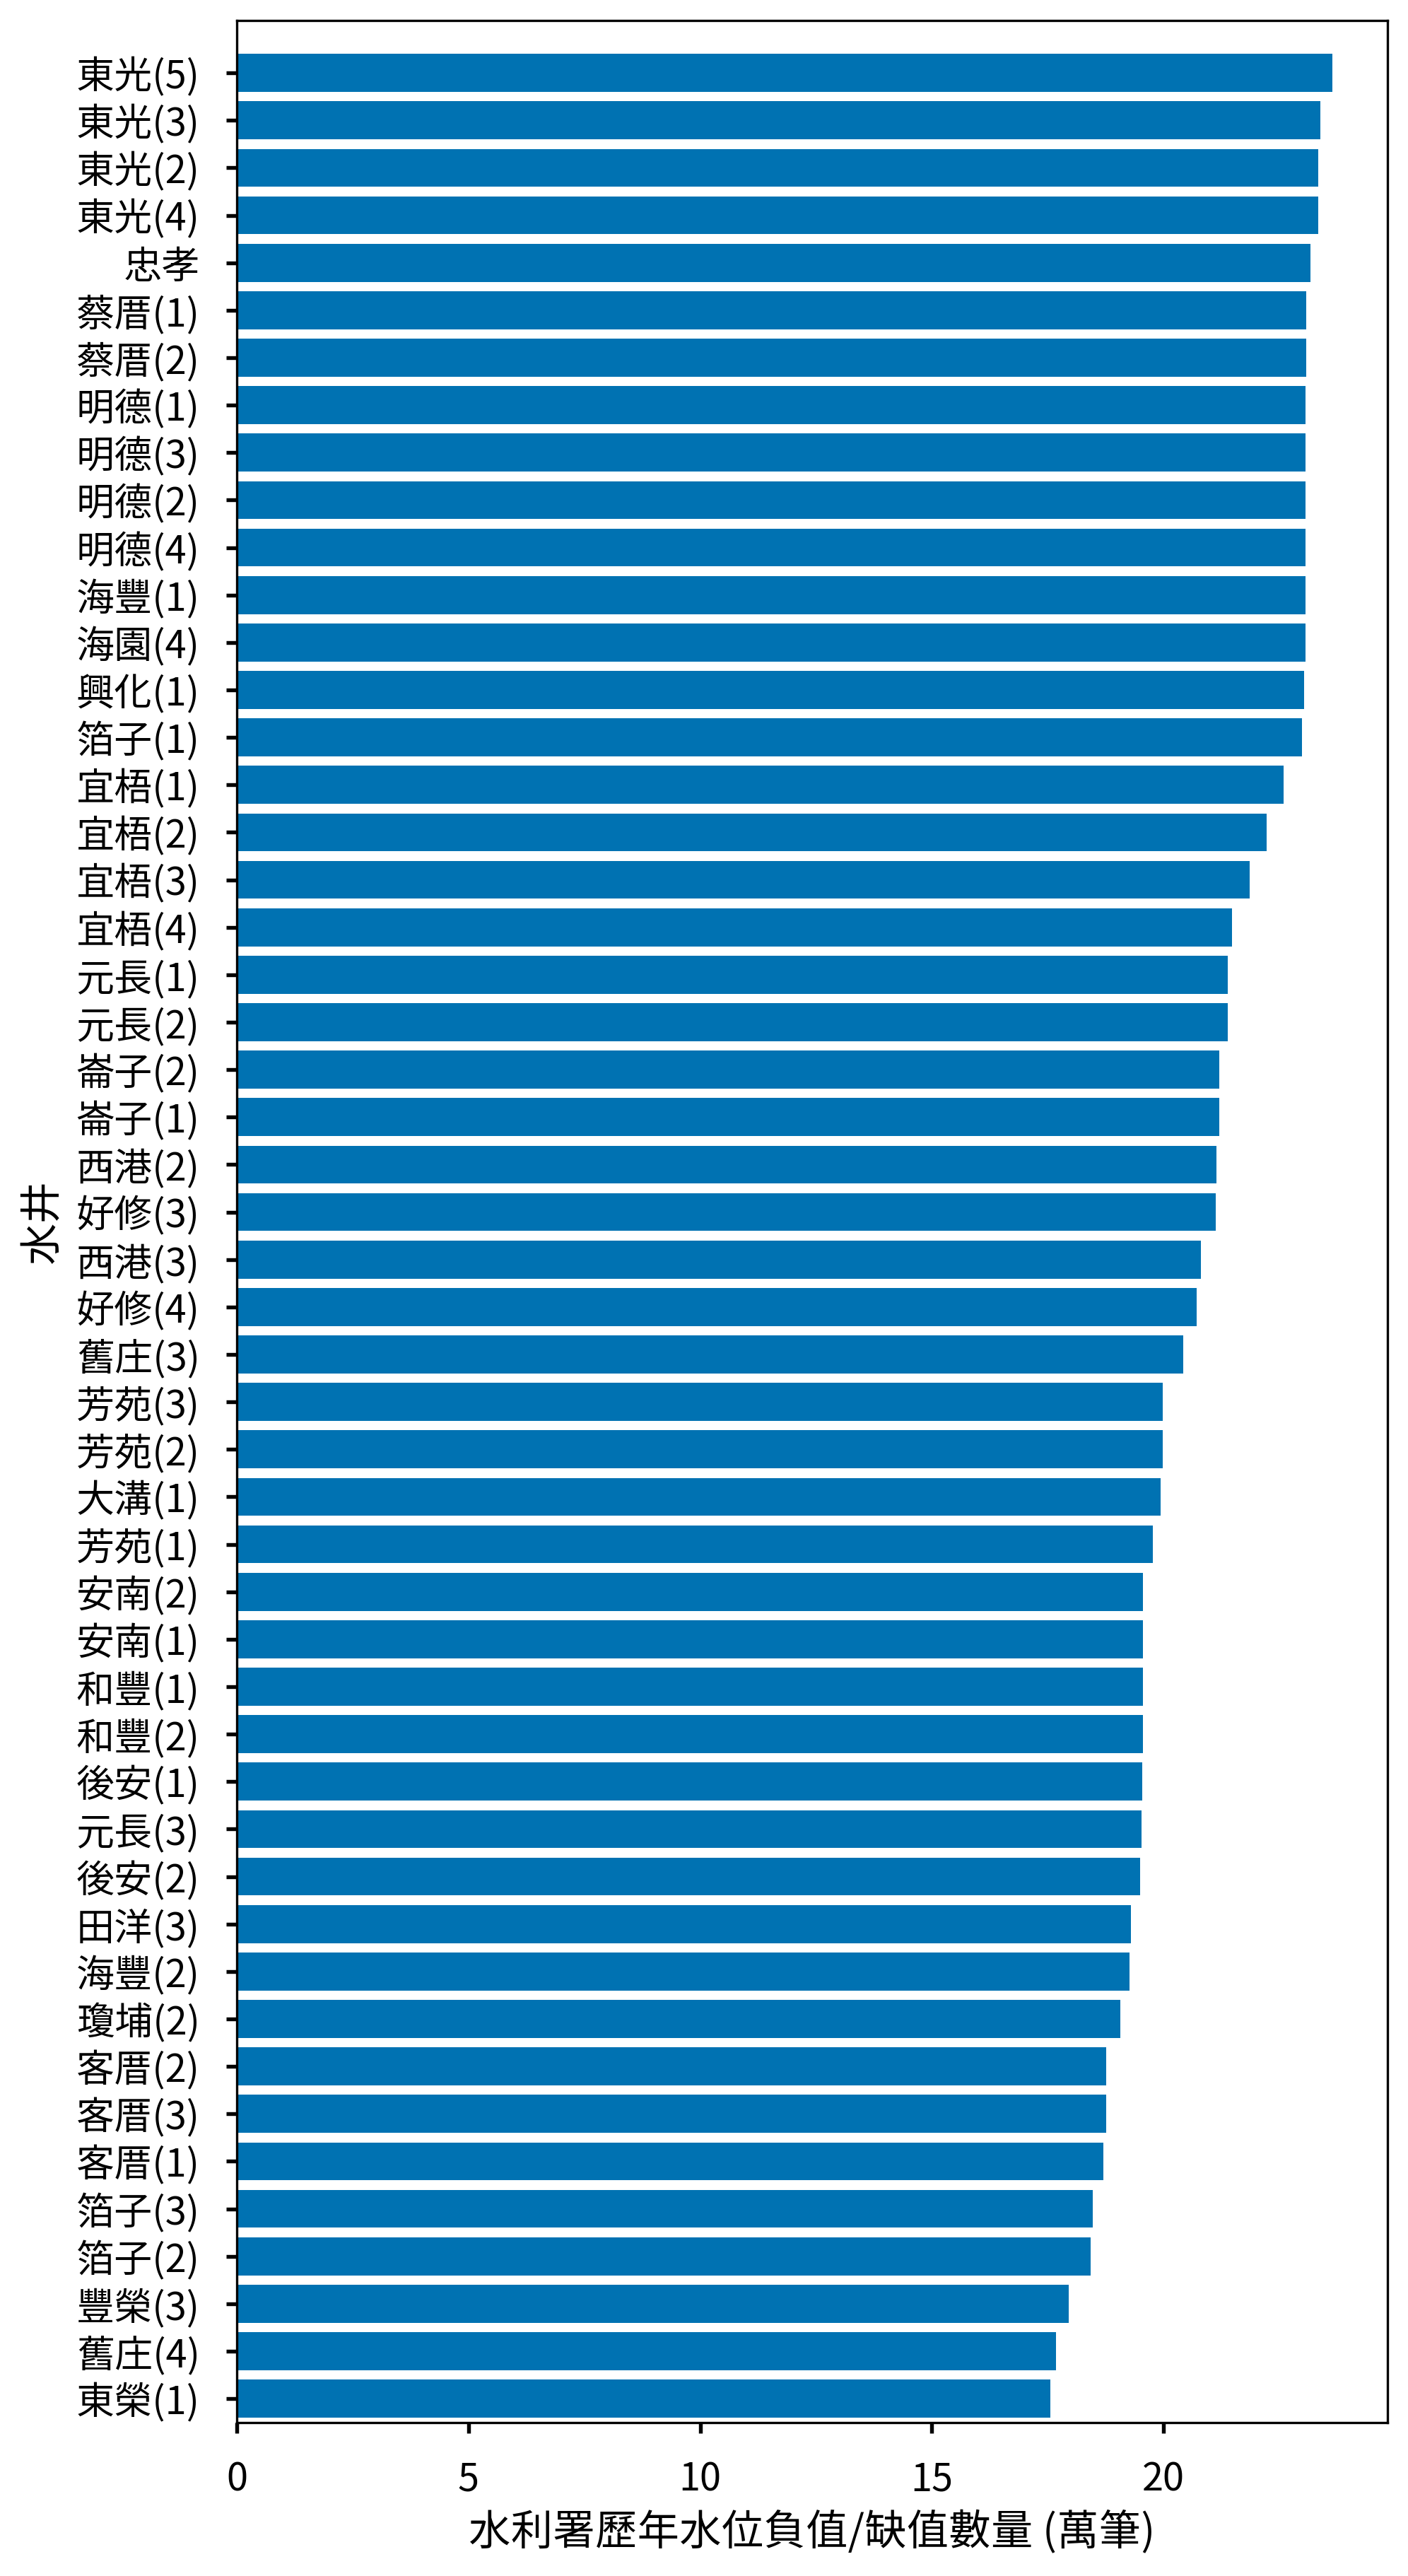

In [134]:
idx = np.argsort(counts)
display_wells = 50
plt.figure(figsize=(7, 15))
plt.barh(values[idx[-display_wells::]], counts[idx[-display_wells::]]*.0001)
plt.xlabel('水利署歷年水位負值/缺值數量 (萬筆)')
plt.ylabel('水井')
plt.ylim(-.5, display_wells+.1)
plt.savefig('results/wl_wra_negative_amount_{}_{}.png'.format(display_wells, date))
print(date)

In [136]:
pd.DataFrame({'水井': values, '負缺值數量': counts}).to_csv('results/wl_wra_negative_amount_{}.csv'.format(date), index=False)

In [119]:
np.array([1, 2, 3, 4])[:-2:-1]

array([4])

## Calculate the defect rate of each well

In [138]:
# computation costs 619s
well_names = []
rates = []
dcounts = []
for well_name in zaf_mo2['井名'].unique():
    X = zaf_mo2[zaf_mo2['井名'] == well_name]
    well_names.append(well_name)
    rates.append(round(X['水位(m)'].isna().sum()/len(X)*100, 1))
    dcounts.append(X['水位(m)'].isna().sum())

rate_df = pd.DataFrame({'井名': well_names, '不良率(%)': rates, '負/缺值數': dcounts})

In [169]:
# try multiprocess
from dask import delayed
from dask.distributed import Client
client = Client(memory_limit='6GB')

In [170]:
def count(well_name, df):
    X = df[df['井名'] == well_name].copy()
    defect = X['水位(m)'].isna().sum()
    return [well_name, defect, round(defect/len(X)*100, 1)]

df_future = client.scatter(zaf_mo2)
compile_list = []
for well_name in zaf_mo2['井名'].unique():
    compile_list.append(delayed(count)(well_name, df_future))

In [166]:
delayed(compile_list).visualize('results/count_defect_rate.svg')

In [171]:
# computation costs only 231s
import dask
total = dask.compute(*compile_list)

In [172]:
rate_df = pd.DataFrame(total, columns=['井名', '負/缺值數', '不良率'])
rate_df

,井名,負/缺值數,不良率
0,顏厝,3240,3.1
1,溪湖(1),18833,10.4
2,溪湖(2),1365,0.8
3,溪湖(3),31245,17.1
4,田中(1),609,0.3
...,...,...,...
221,洛津(2),138157,100.0
222,六腳(1),135162,100.0
223,六腳(3),135164,100.0
224,六腳(2),135164,100.0


# Output results
The output file's encoding is UTF-8 (default).

In [ ]:
zaf_mo2.to_csv('data/database_ZAF_wl_clean_{}.csv'.format(date))
print(date)

20211007


In [184]:
rate_df.to_csv('results/wl_wra_well_condition_{}.csv'.format(date), index=False)

In [185]:
client.close()